# Heart Attack Prediction

In this model, we try to predict weather a person has more chance or less chance of heart attack

Dataset: https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility


### Importing Libraries

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

## Importing dataset

In [8]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data = pd.read_csv('../input/health-care-data-set-on-heart-attack-possibility/heart.csv')

In [22]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Variable description

1. age
2. sex
3. cp: chest pain type (4 values)
4. trestbps : resting blood pressure
5. chol : serum cholestoral in mg/dl
6. fbs : fasting blood sugar > 120 mg/dl
7. restecg : resting electrocardiographic results (values 0,1,2)
8. thalach : maximum heart rate achieved
9. exang : exercise induced angina
10. oldpeak : ST depression induced by exercise relative to rest
11. slope : the slope of the peak exercise ST segment
12. ca : number of major vessels (0-3) colored by flourosopy
13. thal : 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target : 0= less chance of heart attack 1= more chance of heart attack

## EDA

<AxesSubplot:xlabel='target', ylabel='count'>

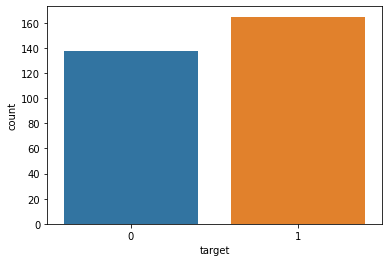

In [28]:
sns.countplot(x = 'target', data = data)

<AxesSubplot:xlabel='sex', ylabel='count'>

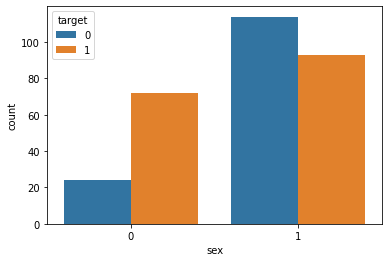

In [30]:
sns.countplot(x = 'sex', hue = 'target', data = data)

<AxesSubplot:xlabel='cp', ylabel='count'>

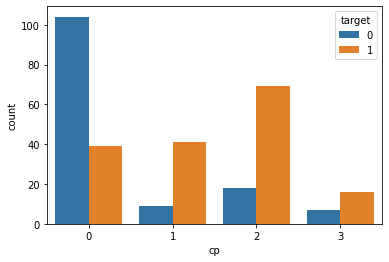

In [31]:
sns.countplot(x = 'cp', hue = 'target', data = data)

<AxesSubplot:xlabel='fbs', ylabel='count'>

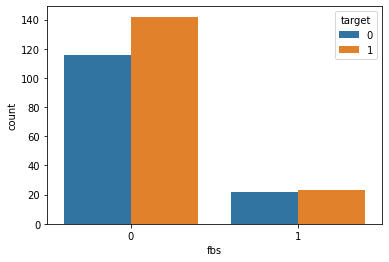

In [32]:
sns.countplot(x = 'fbs', hue = 'target', data = data)

<AxesSubplot:xlabel='restecg', ylabel='count'>

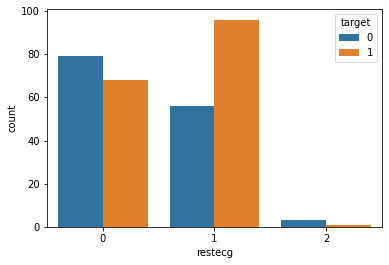

In [33]:
sns.countplot(x = 'restecg', hue = 'target', data = data)

<AxesSubplot:xlabel='exang', ylabel='count'>

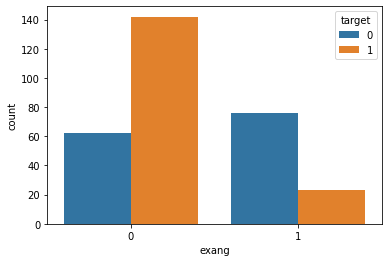

In [34]:
sns.countplot(x = 'exang', hue = 'target', data = data)

<AxesSubplot:xlabel='slope', ylabel='count'>

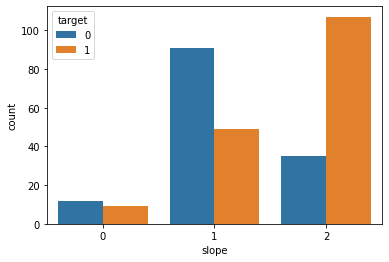

In [35]:
sns.countplot(x = 'slope', hue = 'target', data = data)

<AxesSubplot:xlabel='ca', ylabel='count'>

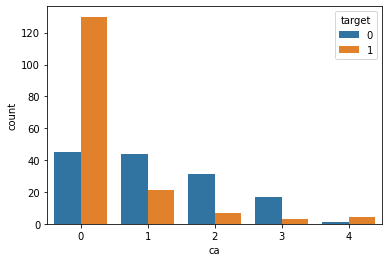

In [37]:
sns.countplot(x = 'ca', hue = 'target', data = data)

<AxesSubplot:xlabel='thal', ylabel='count'>

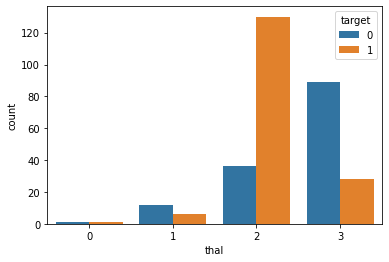

In [36]:
sns.countplot(x = 'thal', hue = 'target', data = data)

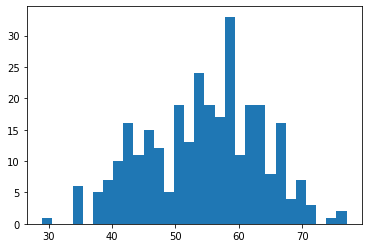

In [47]:
plt.hist(data["age"], bins = 30)

(array([ 2.,  5.,  3., 10., 19., 13.,  8., 41., 18., 16., 44., 14., 13.,
        35.,  9., 19.,  6.,  2., 11.,  1.,  1.,  4.,  2.,  2.,  3.,  0.,
         0.,  1.,  0.,  1.]),
 array([ 94.        ,  97.53333333, 101.06666667, 104.6       ,
        108.13333333, 111.66666667, 115.2       , 118.73333333,
        122.26666667, 125.8       , 129.33333333, 132.86666667,
        136.4       , 139.93333333, 143.46666667, 147.        ,
        150.53333333, 154.06666667, 157.6       , 161.13333333,
        164.66666667, 168.2       , 171.73333333, 175.26666667,
        178.8       , 182.33333333, 185.86666667, 189.4       ,
        192.93333333, 196.46666667, 200.        ]),
 <BarContainer object of 30 artists>)

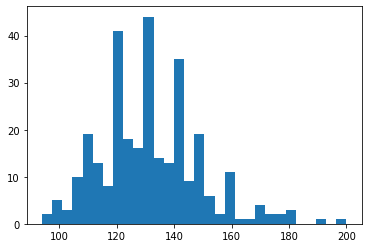

In [50]:
plt.hist(data["trestbps"], bins = 30)

(array([ 2.,  1.,  2.,  2.,  5., 11.,  7.,  9., 24., 22., 18., 23., 22.,
        23., 20., 18., 18., 14.,  9., 10., 15.,  6.,  7.,  4.,  3.,  1.,
         2.,  0.,  0.,  0.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([126.  , 134.76, 143.52, 152.28, 161.04, 169.8 , 178.56, 187.32,
        196.08, 204.84, 213.6 , 222.36, 231.12, 239.88, 248.64, 257.4 ,
        266.16, 274.92, 283.68, 292.44, 301.2 , 309.96, 318.72, 327.48,
        336.24, 345.  , 353.76, 362.52, 371.28, 380.04, 388.8 , 397.56,
        406.32, 415.08, 423.84, 432.6 , 441.36, 450.12, 458.88, 467.64,
        476.4 , 485.16, 493.92, 502.68, 511.44, 520.2 , 528.96, 537.72,
        546.48, 555.24, 564.  ]),
 <BarContainer object of 50 artists>)

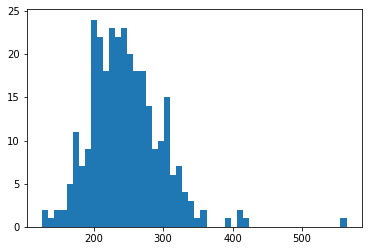

In [53]:
plt.hist(data["chol"], bins = 50)

(array([ 1.,  0.,  0.,  1.,  1.,  4.,  1.,  5.,  5.,  9.,  7., 10., 13.,
        17.,  5., 12., 27., 14., 22., 26., 29., 20., 20., 23., 13.,  8.,
         5.,  2.,  2.,  1.]),
 array([ 71.        ,  75.36666667,  79.73333333,  84.1       ,
         88.46666667,  92.83333333,  97.2       , 101.56666667,
        105.93333333, 110.3       , 114.66666667, 119.03333333,
        123.4       , 127.76666667, 132.13333333, 136.5       ,
        140.86666667, 145.23333333, 149.6       , 153.96666667,
        158.33333333, 162.7       , 167.06666667, 171.43333333,
        175.8       , 180.16666667, 184.53333333, 188.9       ,
        193.26666667, 197.63333333, 202.        ]),
 <BarContainer object of 30 artists>)

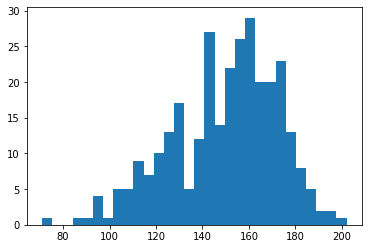

In [55]:
plt.hist(data["thalach"], bins = 30)

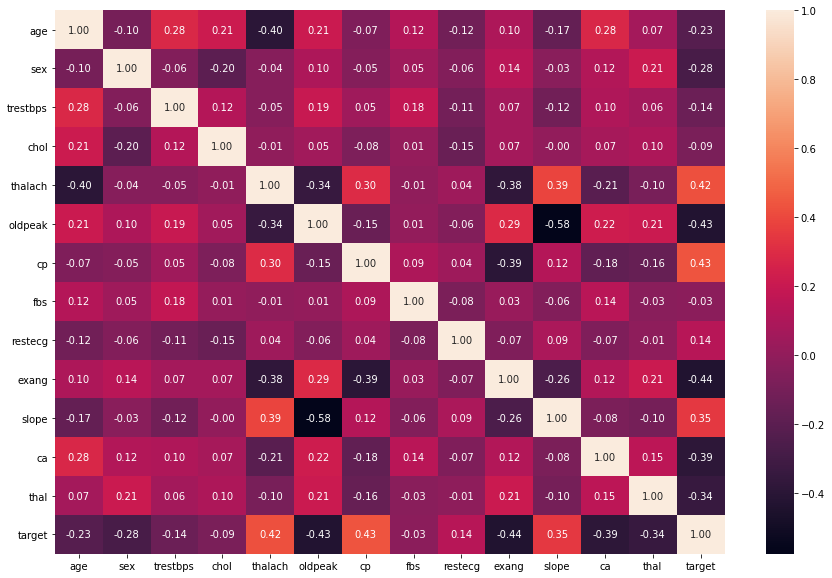

In [56]:
list = ["age","sex","trestbps","chol","thalach","oldpeak", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]
plt.figure(figsize=(15,10))
sns.heatmap(data[list].corr(), annot=True, fmt=".2f")
plt.show()

## Train-CV-Test Split

In [57]:
x = data.drop(["target"], axis=1)
y = data["target"]

In [113]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)



## Model Training

In [95]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [116]:
loreg = LogisticRegression(C = 10)

loreg.fit(x_train, y_train)

y_pred = loreg.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


[[19  7]
 [ 3 32]]
0.8360655737704918


In [106]:
GNB = GaussianNB()

GNB.fit(x_train, y_train)

y_pred = GNB.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


[[25  5]
 [ 2 29]]
0.8852459016393442


In [115]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[22  4]
 [ 5 30]]
0.8524590163934426


## Observation

Naive Baye's gives the best accuracy